In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
file_path = '/content/drive/MyDrive/HSM564/'

In [ ]:
# Load the dataset
breast_cancer = pd.read_csv(file_path + 'BRCA.csv')

# Display the first few rows
breast_cancer.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status,Diff_btw_surgery_lastvisit
0,TCGA-D8-A1XD,36,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive,155.0
1,TCGA-EW-A1OX,43,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Lumpectomy,26-Apr-17,9-Nov-18,Dead,562.0
2,TCGA-A8-A079,69,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Other,8-Sep-17,9-Jun-18,Alive,274.0
3,TCGA-D8-A1XR,56,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive,168.0
4,TCGA-BH-A0BF,56,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Other,6-May-17,27-Jun-19,Dead,782.0


In [ ]:
breast_cancer.shape

(334, 14)

In [ ]:
import sys
# append the function .py file file path to the system path
# function.py is uploaded to /content/drive/MyDrive/Functions folder
if '/content/drive/MyDrive/HSM564' not in sys.path:
  sys.path.append('/content/drive/MyDrive/HSM564')

In [ ]:
import function as fun

In [ ]:
# check the data types
breast_cancer.dtypes


Patient_ID                     object
Age                             int64
Gender                         object
Protein1                      float64
Protein2                      float64
Protein3                      float64
Protein4                      float64
Tumour_Stage                   object
Histology                      object
Surgery_type                   object
Date_of_Surgery                object
Date_of_Last_Visit             object
Patient_Status                 object
Diff_btw_surgery_lastvisit    float64
dtype: object

In [ ]:
fun.metadata(breast_cancer)

,column_name,datatype,missing_percent,unique,mean,std,min,25%,50%,75%,max
0,Patient_ID,object,0.00,334,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Age,int64,0.00,57,58.886228,12.961212,29.00000,49.000000,58.000000,68.000000,90.0000
2,Gender,object,0.00,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Protein1,float64,0.00,333,-0.029991,0.563588,-2.34090,-0.358888,0.006129,0.343598,1.5936
4,Protein2,float64,0.00,334,0.946896,0.911637,-0.97873,0.362173,0.992805,1.627900,3.4022
5,Protein3,float64,0.00,334,-0.090204,0.585175,-1.62740,-0.513748,-0.173180,0.278353,2.1934
6,Protein4,float64,0.00,333,0.009819,0.629055,-2.02550,-0.377090,0.041768,0.425630,1.6299
7,Tumour_Stage,object,0.00,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Histology,object,0.00,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Surgery_type,object,0.00,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#check counts for each unique record within the 'Gender' column
breast_cancer['Gender'].value_counts()

Gender
FEMALE    330
MALE        4
Name: count, dtype: int64

In [ ]:
#check counts for each unique record within the 'Tumour Stage' column
breast_cancer['Tumour_Stage'].value_counts()

Tumour_Stage
II     189
III     81
I       64
Name: count, dtype: int64

In [ ]:
#check counts for each unique record within the 'Histology' column
breast_cancer['Histology'].value_counts()

Histology
Infiltrating Ductal Carcinoma     233
Infiltrating Lobular Carcinoma     89
Mucinous Carcinoma                 12
Name: count, dtype: int64

In [ ]:
#check counts for each unique record within the 'Srugery type' column
breast_cancer['Surgery_type'].value_counts()

Surgery_type
Other                          105
Modified Radical Mastectomy     96
Simple Mastectomy               67
Lumpectomy                      66
Name: count, dtype: int64

In [ ]:
breast_cancer[(breast_cancer['Date_of_Last_Visit'].isna()) | (breast_cancer['Patient_Status'].isna())
 | (breast_cancer['Diff_btw_surgery_lastvisit'].isna())]

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status,Diff_btw_surgery_lastvisit
7,TCGA-A7-A426,50,FEMALE,0.672490,1.27900,-0.321070,-0.112390,III,Infiltrating Ductal Carcinoma,Simple Mastectomy,16-May-17,NaN,NaN,NaN
22,TCGA-AN-A0FY,55,FEMALE,0.330640,0.84757,-0.494660,0.116560,I,Infiltrating Lobular Carcinoma,Modified Radical Mastectomy,7-Nov-17,NaN,NaN,NaN
99,TCGA-A8-A06O,60,FEMALE,0.532420,1.54110,-1.009500,-0.125880,I,Infiltrating Ductal Carcinoma,Other,11-Dec-17,NaN,NaN,NaN
111,TCGA-MS-A51U,44,FEMALE,-0.278840,2.16880,-0.462330,0.272200,II,Infiltrating Ductal Carcinoma,Modified Radical Mastectomy,20-Jan-18,NaN,NaN,NaN
170,TCGA-AR-A0U2,47,FEMALE,0.515580,2.65020,-0.103130,-0.045725,III,Infiltrating Lobular Carcinoma,Modified Radical Mastectomy,29-Jul-18,NaN,Dead,NaN
182,TCGA-C8-A1HI,40,FEMALE,-1.455300,-0.74177,1.133600,-0.839700,III,Infiltrating Lobular Carcinoma,Other,7-Sep-18,NaN,NaN,NaN
189,TCGA-AO-A03O,69,FEMALE,-0.757790,-0.33780,0.561410,0.208300,II,Infiltrating Lobular Carcinoma,Modified Radical Mastectomy,7-Oct-18,NaN,Dead,NaN
196,TCGA-C8-A12U,46,FEMALE,-0.010999,0.86749,0.281570,-0.545880,II,Infiltrating Lobular Carcinoma,Other,10-Jun-19,NaN,NaN,NaN
206,TCGA-E9-A1NH,71,FEMALE,0.394090,1.70540,0.035642,1.441000,II,Infiltrating Lobular Carcinoma,Modified Radical Mastectomy,26-Nov-18,NaN,NaN,NaN
219,TCGA-C8-A12X,62,FEMALE,0.649340,1.81680,0.279260,0.132280,II,Infiltrating Lobular Carcinoma,Other,20-Jun-19,NaN,NaN,NaN


In [ ]:
# Column Date_of_Last_Visit frequency
Date_of_Last_Visit_count_table = breast_cancer.groupby(['Date_of_Last_Visit']).size().reset_index(name = 'counts')
Date_of_Last_Visit_freq = Date_of_Last_Visit_count_table.sort_values(by = 'counts', ascending = False).iloc[0, 0]

#Column Patient_Status
Patient_Status_count_table = breast_cancer.groupby(['Patient_Status']).size().reset_index(name = 'counts')
Patient_Status_freq = Patient_Status_count_table.sort_values(by = 'counts', ascending = False).iloc[0, 0]

#Column Diff_btw_surgery_lastvisit
Diff_btw_surgery_lastvisit_count_table = breast_cancer.groupby(['Diff_btw_surgery_lastvisit']).size().reset_index(name = 'counts')
Diff_btw_surgery_lastvisit_freq = Diff_btw_surgery_lastvisit_count_table.sort_values(by = 'counts', ascending = False).iloc[0, 0]

breast_cancer_freq = breast_cancer.copy()
breast_cancer_freq[['Date_of_Last_Visit']] = breast_cancer_freq[['Date_of_Last_Visit']].fillna(Date_of_Last_Visit_freq)
breast_cancer_freq[['Patient_Status']] = breast_cancer_freq[['Patient_Status']].fillna(Patient_Status_freq)
breast_cancer_freq[['Diff_btw_surgery_lastvisit']] = breast_cancer_freq[['Diff_btw_surgery_lastvisit']].fillna(Diff_btw_surgery_lastvisit_freq)

breast_cancer_freq.iloc[[99, 111, 170, 182, 189, 196, 206, 219, 221, 265, 283, 285, 286, 305, 321
]]


,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status,Diff_btw_surgery_lastvisit
99,TCGA-A8-A06O,60,FEMALE,0.532420,1.54110,-1.009500,-0.125880,I,Infiltrating Ductal Carcinoma,Other,11-Dec-17,9-Aug-19,Alive,396.0
111,TCGA-MS-A51U,44,FEMALE,-0.278840,2.16880,-0.462330,0.272200,II,Infiltrating Ductal Carcinoma,Modified Radical Mastectomy,20-Jan-18,9-Aug-19,Alive,396.0
170,TCGA-AR-A0U2,47,FEMALE,0.515580,2.65020,-0.103130,-0.045725,III,Infiltrating Lobular Carcinoma,Modified Radical Mastectomy,29-Jul-18,9-Aug-19,Dead,396.0
182,TCGA-C8-A1HI,40,FEMALE,-1.455300,-0.74177,1.133600,-0.839700,III,Infiltrating Lobular Carcinoma,Other,7-Sep-18,9-Aug-19,Alive,396.0
189,TCGA-AO-A03O,69,FEMALE,-0.757790,-0.33780,0.561410,0.208300,II,Infiltrating Lobular Carcinoma,Modified Radical Mastectomy,7-Oct-18,9-Aug-19,Dead,396.0
196,TCGA-C8-A12U,46,FEMALE,-0.010999,0.86749,0.281570,-0.545880,II,Infiltrating Lobular Carcinoma,Other,10-Jun-19,9-Aug-19,Alive,396.0
206,TCGA-E9-A1NH,71,FEMALE,0.394090,1.70540,0.035642,1.441000,II,Infiltrating Lobular Carcinoma,Modified Radical Mastectomy,26-Nov-18,9-Aug-19,Alive,396.0
219,TCGA-C8-A12X,62,FEMALE,0.649340,1.81680,0.279260,0.132280,II,Infiltrating Lobular Carcinoma,Other,20-Jun-19,9-Aug-19,Alive,396.0
221,TCGA-C8-A12O,50,FEMALE,-0.322890,0.98848,-0.293130,-0.261700,II,Infiltrating Ductal Carcinoma,Other,16-Nov-18,9-Aug-19,Alive,396.0
265,TCGA-BH-A18S,79,FEMALE,0.978250,1.71050,-0.656300,0.269100,I,Infiltrating Ductal Carcinoma,Other,5-Apr-19,9-Aug-19,Dead,396.0


Patient_ID has more than 10 unique values
There is no outlier of Age.
----------------------Box plot---------------------


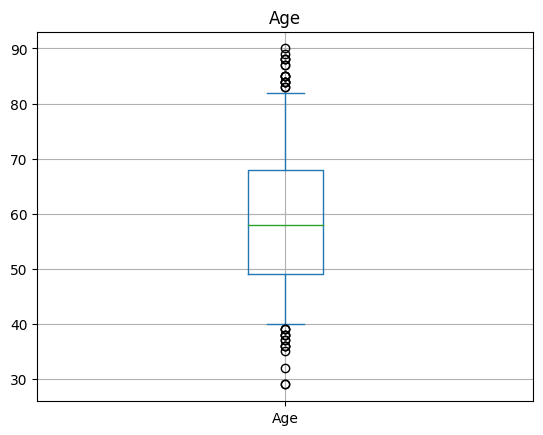

----------------------Distribution plot---------------------


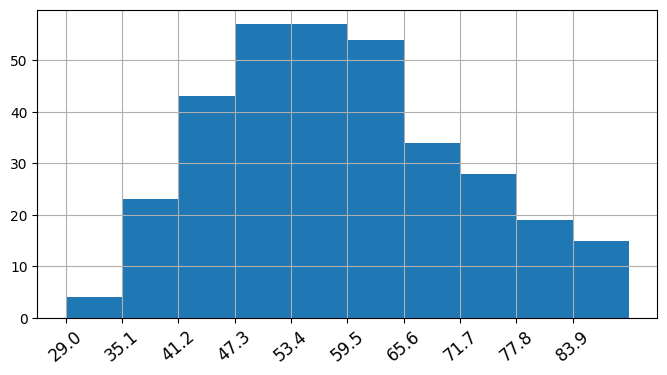

   Gender  counts  %count
0  FEMALE     330    98.8
1    MALE       4     1.2


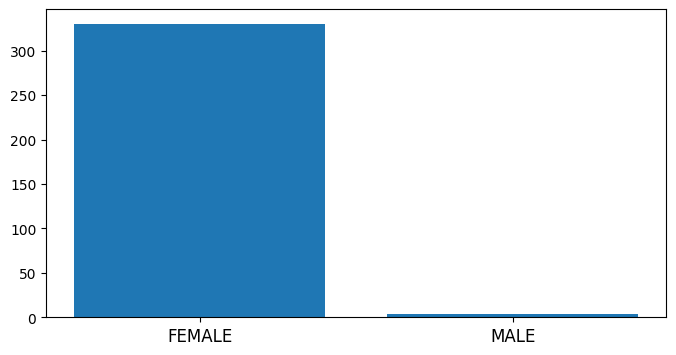

There are 3 of outliers for Protein1.
[-2.1446, -1.9711, -2.3409]
----------------------Box plot---------------------


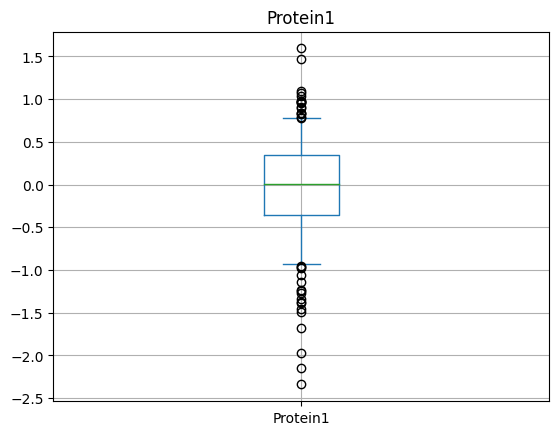

----------------------Distribution plot---------------------


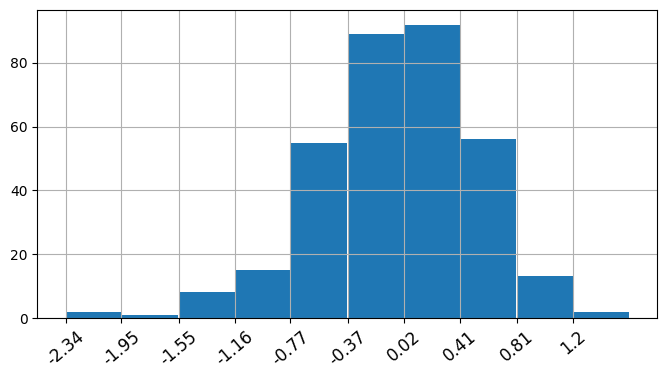

There is no outlier of Protein2.
----------------------Box plot---------------------


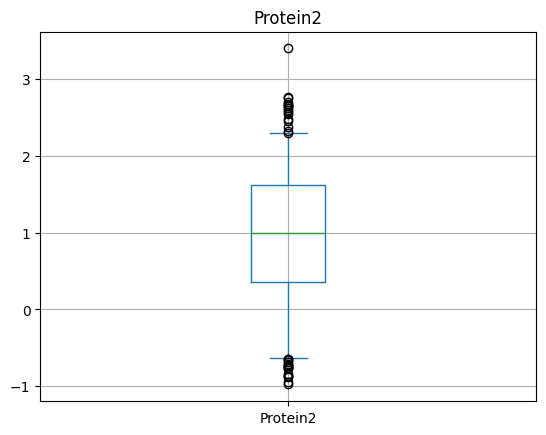

----------------------Distribution plot---------------------


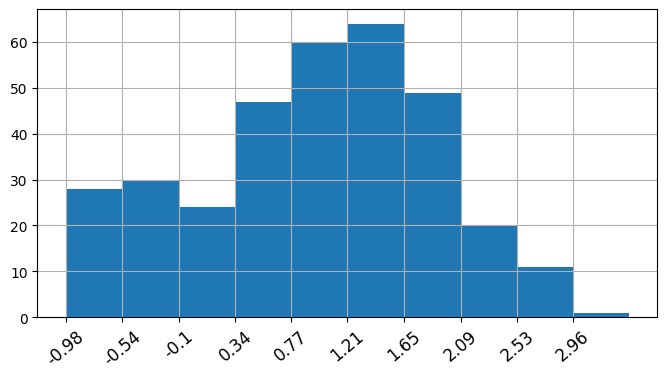

There are 3 of outliers for Protein3.
[1.7019, 1.7691, 2.1934]
----------------------Box plot---------------------


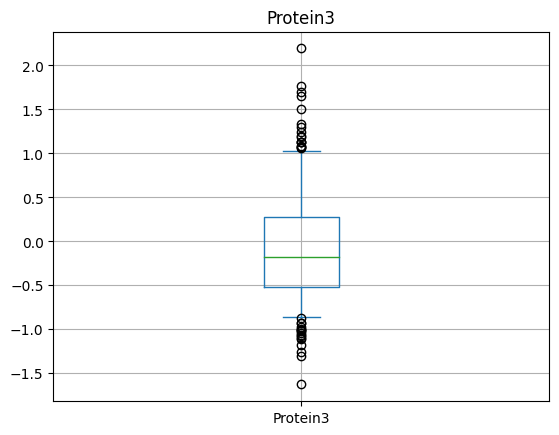

----------------------Distribution plot---------------------


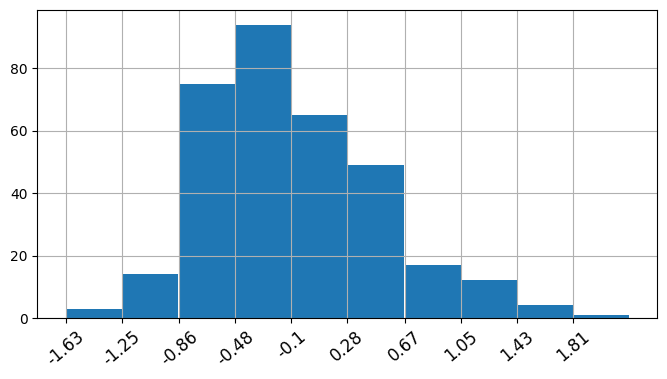

There are 2 of outliers for Protein4.
[-2.0255, -1.8993]
----------------------Box plot---------------------


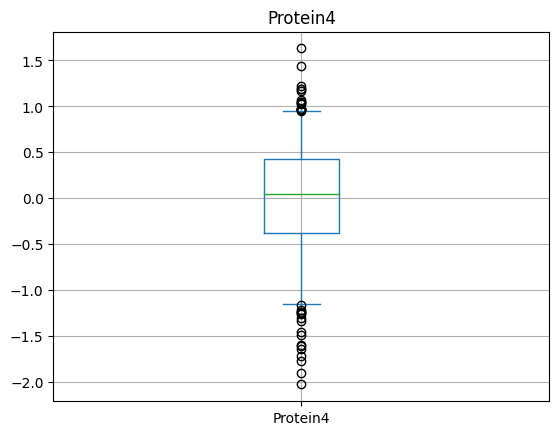

----------------------Distribution plot---------------------


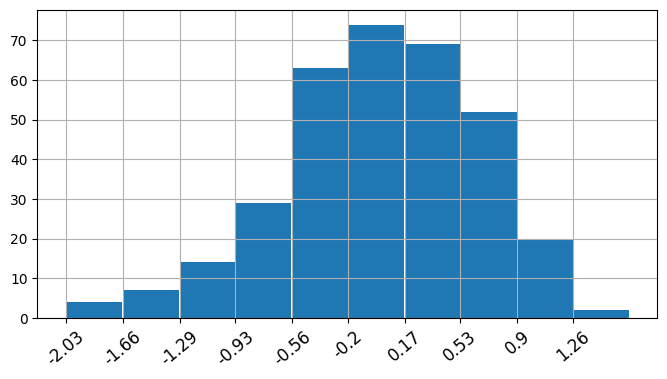

  Tumour_Stage  counts  %count
0            I      64   19.16
1           II     189   56.59
2          III      81   24.25


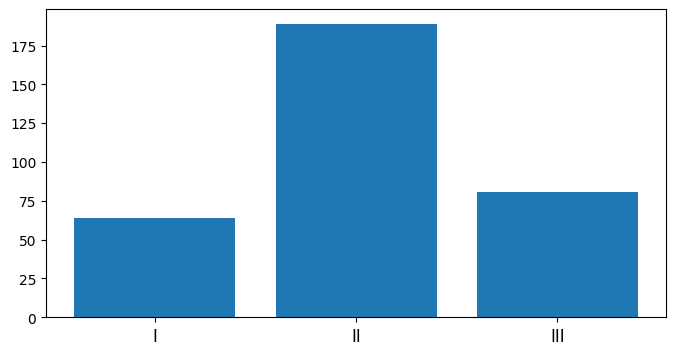

                        Histology  counts  %count
0   Infiltrating Ductal Carcinoma     233   69.76
1  Infiltrating Lobular Carcinoma      89   26.65
2              Mucinous Carcinoma      12    3.59


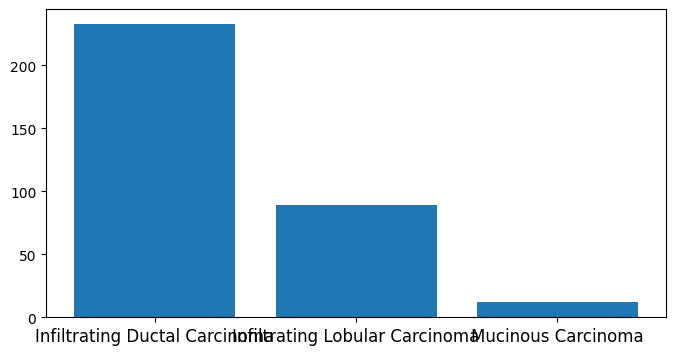

                  Surgery_type  counts  %count
0                   Lumpectomy      66   19.76
1  Modified Radical Mastectomy      96   28.74
2                        Other     105   31.44
3            Simple Mastectomy      67   20.06


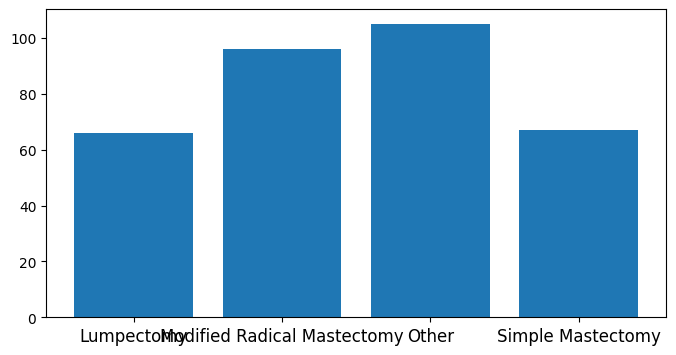

Date_of_Surgery has more than 10 unique values
Date_of_Last_Visit has more than 10 unique values
  Patient_Status  counts  %count
0          Alive     255   76.35
1           Dead      66   19.76


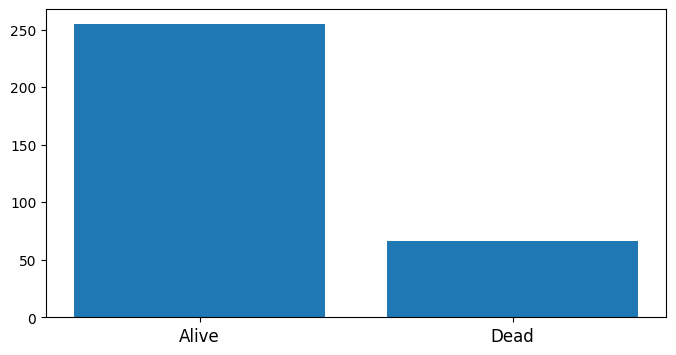

There are 5 of outliers for Diff_btw_surgery_lastvisit.
[1888.0, 3019.0, 2317.0, 2763.0, 1648.0]
----------------------Box plot---------------------


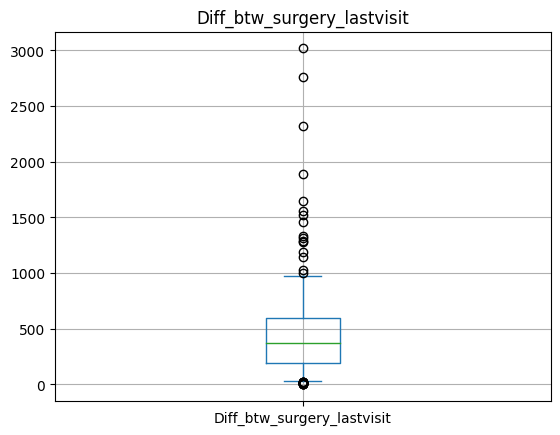

----------------------Distribution plot---------------------


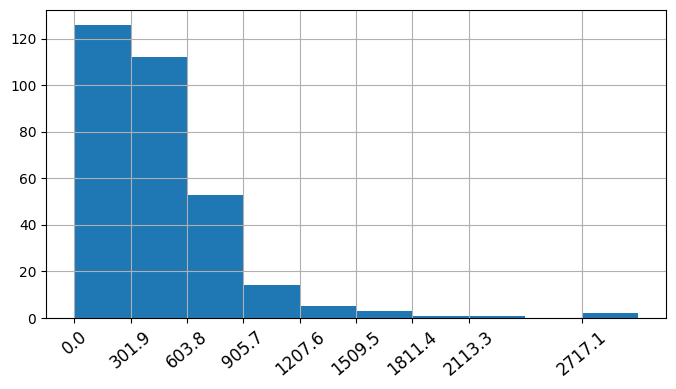

In [ ]:
#data exploration
for column in breast_cancer.columns:
  fun.data_exploration (breast_cancer, column)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode 'Gender' column
breast_cancer['Gender'] = label_encoder.fit_transform(breast_cancer['Gender'])
breast_cancer['Gender'] = breast_cancer['Gender'].astype('category')

  Gender  counts  %count
0      0     330    98.8
1      1       4     1.2


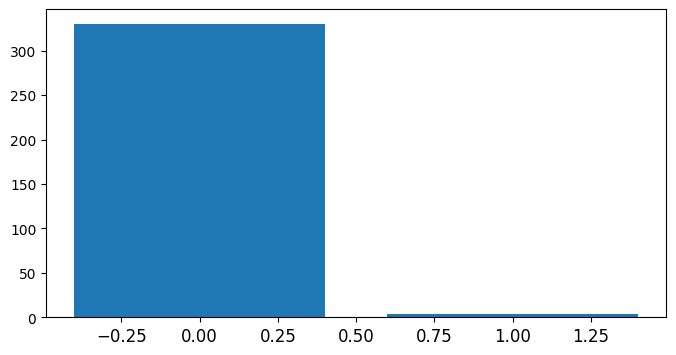

In [ ]:
fun.data_exploration(breast_cancer, 'Gender')

In [ ]:
# Encode 'Gender' column
breast_cancer['Tumour_Stage'] = label_encoder.fit_transform(breast_cancer['Tumour_Stage'])
breast_cancer['Tumour_Stage'] = breast_cancer['Tumour_Stage'].astype('category')

  Tumour_Stage  counts  %count
0            0      64   19.16
1            1     189   56.59
2            2      81   24.25


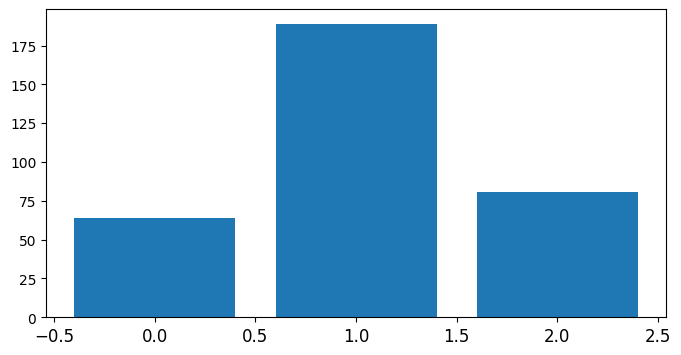

In [ ]:
fun.data_exploration(breast_cancer, 'Tumour_Stage')

In [ ]:
breast_cancer['Histology'] = label_encoder.fit_transform(breast_cancer['Histology'])
breast_cancer['Histology'] = breast_cancer['Histology'].astype('category')

  Tumour_Stage  counts  %count
0            0      64   19.16
1            1     189   56.59
2            2      81   24.25


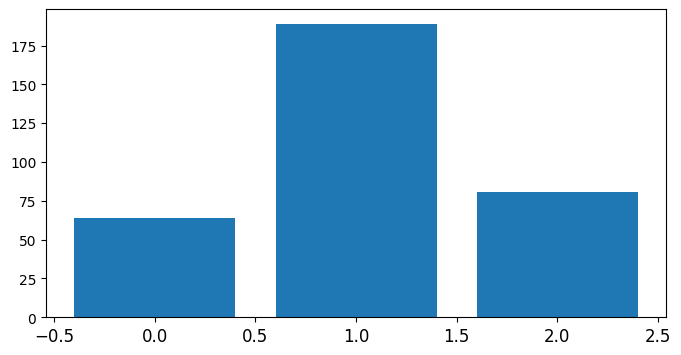

In [ ]:
fun.data_exploration(breast_cancer, 'Tumour_Stage')

In [ ]:
breast_cancer['Surgery_type'] = label_encoder.fit_transform(breast_cancer['Surgery_type'])
breast_cancer['Surgery_type'] = breast_cancer['Surgery_type'].astype('category')

  Surgery_type  counts  %count
0            0      66   19.76
1            1      96   28.74
2            2     105   31.44
3            3      67   20.06


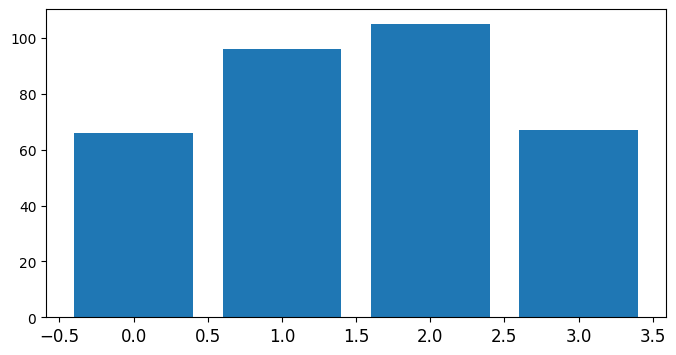

In [ ]:
fun.data_exploration(breast_cancer, 'Surgery_type')

In [ ]:
fun.metadata(breast_cancer)

,column_name,datatype,missing_percent,unique,mean,std,min,25%,50%,75%,max
0,Patient_ID,object,0.00,334,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Age,int64,0.00,57,58.886228,12.961212,29.00000,49.000000,58.000000,68.000000,90.0000
2,Gender,category,0.00,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Protein1,float64,0.00,333,-0.029991,0.563588,-2.34090,-0.358888,0.006129,0.343598,1.5936
4,Protein2,float64,0.00,334,0.946896,0.911637,-0.97873,0.362173,0.992805,1.627900,3.4022
5,Protein3,float64,0.00,334,-0.090204,0.585175,-1.62740,-0.513748,-0.173180,0.278353,2.1934
6,Protein4,float64,0.00,333,0.009819,0.629055,-2.02550,-0.377090,0.041768,0.425630,1.6299
7,Tumour_Stage,category,0.00,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Histology,category,0.00,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Surgery_type,category,0.00,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Define mapping
status_mapping = {'Alive': 0, 'Dead': 1}

# Replace values
breast_cancer['Patient_Status'] = breast_cancer['Patient_Status'].replace(status_mapping)
breast_cancer['Patient_Status'] = breast_cancer['Patient_Status'].astype('category')

  Patient_Status  counts  %count
0            0.0     255   76.35
1            1.0      66   19.76


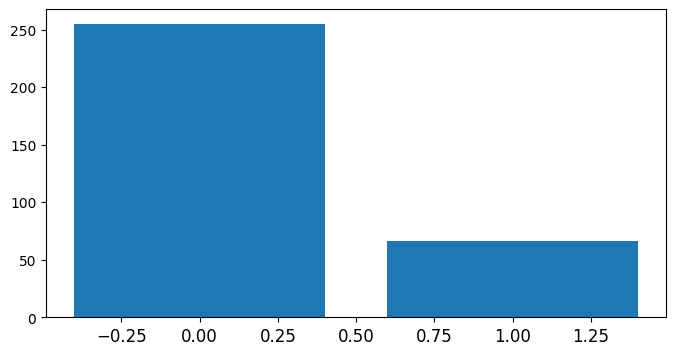

In [ ]:
fun.data_exploration(breast_cancer, 'Patient_Status')

In [ ]:
# Drop columns
columns_to_drop = ['Patient_ID', 'Date_of_Surgery', 'Date_of_Last_Visit']
breast_cancer=breast_cancer.drop(columns=columns_to_drop)

In [ ]:
breast_cancer.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,Surgery_type,Patient_Status,Diff_btw_surgery_lastvisit
0,36,0,0.080353,0.42638,0.54715,0.273680,2,0,1,0.0,155.0
1,43,0,-0.420320,0.57807,0.61447,-0.031505,1,2,0,1.0,562.0
2,69,0,0.213980,1.31140,-0.32747,-0.234260,2,0,2,0.0,274.0
3,56,0,0.345090,-0.21147,-0.19304,0.124270,1,0,1,0.0,168.0
4,56,0,0.221550,1.90680,0.52045,-0.311990,1,0,2,1.0,782.0


In [ ]:
fun.metadata(breast_cancer)

,column_name,datatype,missing_percent,unique,mean,std,min,25%,50%,75%,max
0,Age,int64,0.00,57,58.886228,12.961212,29.00000,49.000000,58.000000,68.000000,90.0000
1,Gender,category,0.00,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Protein1,float64,0.00,333,-0.029991,0.563588,-2.34090,-0.358888,0.006129,0.343598,1.5936
3,Protein2,float64,0.00,334,0.946896,0.911637,-0.97873,0.362173,0.992805,1.627900,3.4022
4,Protein3,float64,0.00,334,-0.090204,0.585175,-1.62740,-0.513748,-0.173180,0.278353,2.1934
5,Protein4,float64,0.00,333,0.009819,0.629055,-2.02550,-0.377090,0.041768,0.425630,1.6299
6,Tumour_Stage,category,0.00,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Histology,category,0.00,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Surgery_type,category,0.00,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Patient_Status,category,3.89,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Calculate the median of the column
median_value = breast_cancer['Diff_btw_surgery_lastvisit'].median()

# Impute missing values with the median
breast_cancer['Diff_btw_surgery_lastvisit'].fillna(median_value, inplace=True)

In [ ]:
# Calculate the mode of the column
mode_value = breast_cancer['Patient_Status'].mode()[0]

# Replace missing values with the mode
breast_cancer['Patient_Status'].fillna(mode_value, inplace=True)

In [ ]:
fun.metadata(breast_cancer)

,column_name,datatype,missing_percent,unique,mean,std,min,25%,50%,75%,max
0,Age,int64,0.0,57,58.886228,12.961212,29.00000,49.000000,58.000000,68.000000,90.0000
1,Gender,category,0.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Protein1,float64,0.0,333,-0.029991,0.563588,-2.34090,-0.358888,0.006129,0.343598,1.5936
3,Protein2,float64,0.0,334,0.946896,0.911637,-0.97873,0.362173,0.992805,1.627900,3.4022
4,Protein3,float64,0.0,334,-0.090204,0.585175,-1.62740,-0.513748,-0.173180,0.278353,2.1934
5,Protein4,float64,0.0,333,0.009819,0.629055,-2.02550,-0.377090,0.041768,0.425630,1.6299
6,Tumour_Stage,category,0.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Histology,category,0.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Surgery_type,category,0.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Patient_Status,category,0.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# we use straified sampling method for class target.
# we use 75% data for training and 25% for testing.
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.drop('Patient_Status',axis=1),
                                                    breast_cancer['Patient_Status'],
                                                    stratify=breast_cancer['Patient_Status'],
                                                    test_size=0.25, random_state=101)

print("The length of training set:", len(X_train))
print("The length of testing  set:", len(X_test))

The length of training set: 250
The length of testing  set: 84


In [ ]:
# let's train a DT model using entropy - 3 % of training data
clf_en_3 = DecisionTreeClassifier(criterion = 'entropy', random_state=100, max_depth = 3,
                                  min_samples_leaf = int(len(X_train)*0.03))
clf_en_3 = clf_en_3.fit(X_train, y_train)
y_pred_en_3 =  clf_en_3.predict(X_test)
print(classification_report(y_test, y_pred_en_3))


              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89        67
         1.0       0.00      0.00      0.00        17

    accuracy                           0.80        84
   macro avg       0.40      0.50      0.44        84
weighted avg       0.64      0.80      0.71        84



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# Drop the target variable from X
X = breast_cancer.drop('Patient_Status', axis=1)

# Handle missing values in X using mode imputation
imputer = SimpleImputer(strategy='most_frequent')
X_imputed = imputer.fit_transform(X)

# Get the target variable
y = breast_cancer['Patient_Status']

# Apply SMOTE to balance the dataset
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_imputed, y)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


print("The length of training set:", len(X_train))
print("The length of testing  set:", len(X_test))

The length of training set: 428
The length of testing  set: 108


In [ ]:
# let's train a DT model using entropy - 3 % of training data
clf_en_3 = DecisionTreeClassifier(criterion = 'entropy', random_state=100, max_depth = 3,
                                  min_samples_leaf = int(len(X_train)*0.03))
clf_en_3 = clf_en_3.fit(X_train, y_train)
y_pred_en_3 =  clf_en_3.predict(X_test)
print(classification_report(y_test, y_pred_en_3))

              precision    recall  f1-score   support

         0.0       0.62      0.61      0.62        54
         1.0       0.62      0.63      0.62        54

    accuracy                           0.62       108
   macro avg       0.62      0.62      0.62       108
weighted avg       0.62      0.62      0.62       108



In [ ]:
# Get all the feature names
X = breast_cancer.drop('Patient_Status', axis=1)
f_names = list(X.columns.values)
print(f_names)

# Also give the target variable a descriptive name
# note - the first item in the list is 0 and the second item is 1 which is our target event
t_name = ['Alive', 'Dead']

['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3', 'Protein4', 'Tumour_Stage', 'Histology', 'Surgery_type', 'Diff_btw_surgery_lastvisit']


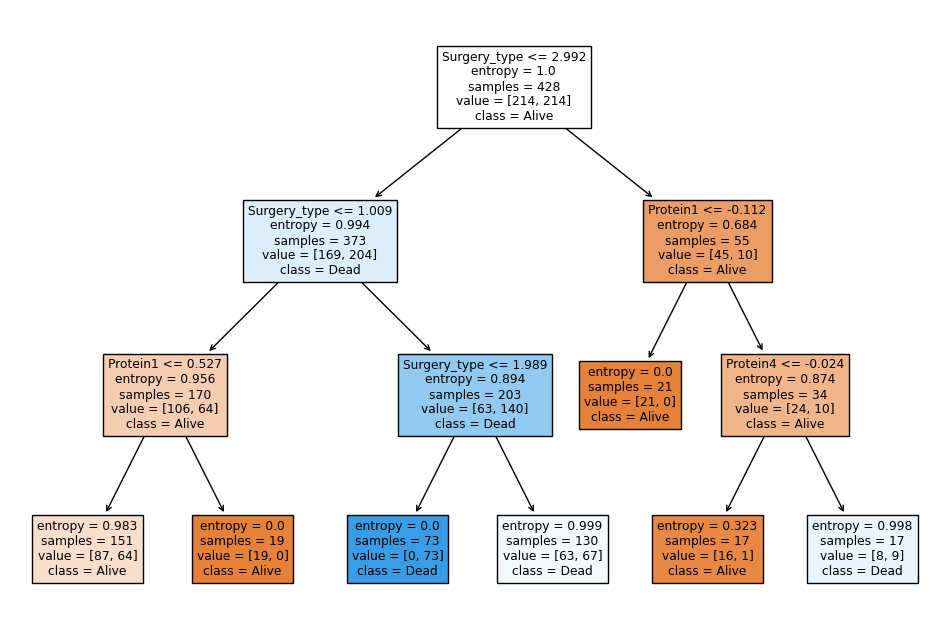

In [ ]:
# The plot_tree returns annotations for the plot, to not show them, assign returned value to _.
fig = plt.figure(figsize=(12, 8))
_ = tree.plot_tree(clf_en_3, feature_names=f_names, class_names=t_name, filled=True)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from scipy.stats import uniform

# Define logistic regression model
logistic_regression = LogisticRegression(max_iter=1000)

# Define hyperparameters to tune
param_distributions = {
    'C': uniform(0.1, 10),  # Regularization parameter
    'solver': ['liblinear', 'saga'],  # Solver for logistic regression
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(logistic_regression, param_distributions=param_distributions, scoring='precision', n_iter=100, cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found:", random_search.best_params_)

# Evaluate the model on the test set
y_pred = random_search.predict(X_test)
precision = precision_score(y_test, y_pred)
print("Precision on test set:", precision)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best parameters found: {'C': 6.086584841970366, 'solver': 'liblinear'}
Precision on test set: 0.5178571428571429


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Use the best parameters found
best_params = {'C': 6.086584841970366, 'solver': 'liblinear'}

# Initialize logistic regression model with best parameters
logistic_regression = LogisticRegression(C=best_params['C'], solver=best_params['solver'])

# Fit the model on the entire resampled dataset
logistic_regression.fit(X_resampled, y_resampled)

# Make predictions on rows 1-20 of X_resampled
predictions = logistic_regression.predict(X_resampled[:20])

# Print predicted and actual results side by side
print("Predicted \t Actual")
for predicted, actual in zip(predictions, y_resampled[:20]):
    print(f"{predicted} \t\t {actual}")


Predicted 	 Actual
1.0 		 0.0
0.0 		 1.0
1.0 		 0.0
0.0 		 0.0
1.0 		 1.0
1.0 		 0.0
1.0 		 0.0
1.0 		 0.0
0.0 		 0.0
1.0 		 0.0
0.0 		 0.0
0.0 		 1.0
0.0 		 0.0
1.0 		 0.0
0.0 		 0.0
1.0 		 0.0
0.0 		 0.0
0.0 		 0.0
1.0 		 1.0
1.0 		 0.0


In [ ]:
from sklearn.metrics import recall_score

# Make predictions on rows 1-20 of X_resampled
predictions = logistic_regression.predict(X_resampled[:20])

# Calculate recall score
recall = recall_score(y_resampled[:20], predictions)

# Print predicted and actual results side by side with recall score
print("Predicted \t Actual")
for predicted, actual in zip(predictions, y_resampled[:20]):
    print(f"{predicted} \t\t {actual}")

print("\nRecall Score:", recall)


Predicted 	 Actual
1.0 		 0.0
0.0 		 1.0
1.0 		 0.0
0.0 		 0.0
1.0 		 1.0
1.0 		 0.0
1.0 		 0.0
1.0 		 0.0
0.0 		 0.0
1.0 		 0.0
0.0 		 0.0
0.0 		 1.0
0.0 		 0.0
1.0 		 0.0
0.0 		 0.0
1.0 		 0.0
0.0 		 0.0
0.0 		 0.0
1.0 		 1.0
1.0 		 0.0

Recall Score: 0.5


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Use the best parameters found
best_params = {'C': 6.086584841970366, 'solver': 'liblinear'}

# Initialize logistic regression model with best parameters
logistic_regression = LogisticRegression(C=best_params['C'], solver=best_params['solver'])

# Fit the model on the entire resampled dataset
logistic_regression.fit(X_resampled, y_resampled)

# Make predictions on rows 1-20 of X_resampled
predictions = logistic_regression.predict(X_resampled[:20])

# Convert actual results to an array for better alignment
actual_results = y_resampled[:20].values

# Print predicted and actual results side-by-side
for i in range(len(predictions)):
    print("Predicted: {}, Actual: {}".format(predictions[i], actual_results[i]))



Predicted: 1.0, Actual: 0.0
Predicted: 0.0, Actual: 1.0
Predicted: 1.0, Actual: 0.0
Predicted: 0.0, Actual: 0.0
Predicted: 1.0, Actual: 1.0
Predicted: 1.0, Actual: 0.0
Predicted: 1.0, Actual: 0.0
Predicted: 1.0, Actual: 0.0
Predicted: 0.0, Actual: 0.0
Predicted: 1.0, Actual: 0.0
Predicted: 0.0, Actual: 0.0
Predicted: 0.0, Actual: 1.0
Predicted: 0.0, Actual: 0.0
Predicted: 1.0, Actual: 0.0
Predicted: 0.0, Actual: 0.0
Predicted: 1.0, Actual: 0.0
Predicted: 0.0, Actual: 0.0
Predicted: 0.0, Actual: 0.0
Predicted: 1.0, Actual: 1.0
Predicted: 1.0, Actual: 0.0


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Use the best parameters found
best_params = {'C': 6.086584841970366, 'solver': 'liblinear'}

# Initialize Gradient Boosting classifier model
gradient_boosting = GradientBoostingClassifier()

# Fit the model on the entire resampled dataset
gradient_boosting.fit(X_resampled, y_resampled)

# Make predictions on rows 1-20 of X_resampled
predictions = gradient_boosting.predict(X_resampled[:20])

# Convert actual results to an array for better alignment
actual_results = y_resampled[:20].values

# Print predicted and actual results side-by-side
for i in range(len(predictions)):
    print("Predicted: {}, Actual: {}".format(predictions[i], actual_results[i]))


Predicted: 0.0, Actual: 0.0
Predicted: 1.0, Actual: 1.0
Predicted: 0.0, Actual: 0.0
Predicted: 0.0, Actual: 0.0
Predicted: 1.0, Actual: 1.0
Predicted: 0.0, Actual: 0.0
Predicted: 0.0, Actual: 0.0
Predicted: 0.0, Actual: 0.0
Predicted: 0.0, Actual: 0.0
Predicted: 0.0, Actual: 0.0
Predicted: 0.0, Actual: 0.0
Predicted: 1.0, Actual: 1.0
Predicted: 0.0, Actual: 0.0
Predicted: 0.0, Actual: 0.0
Predicted: 0.0, Actual: 0.0
Predicted: 0.0, Actual: 0.0
Predicted: 0.0, Actual: 0.0
Predicted: 0.0, Actual: 0.0
Predicted: 1.0, Actual: 1.0
Predicted: 0.0, Actual: 0.0


In [ ]:
from sklearn.metrics import recall_score

# Calculate recall score
recall = recall_score(y_resampled[:20], predictions)

# Print recall score
print("Recall Score:", recall)


Recall Score: 1.0
